# Nonlinear regression exercises

## Linear regression review.

In [1]:
# Import the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create data.
data_size = 20
X = np.linspace(0, 1, data_size)
# Include noise.
noise = np.random.uniform(low=-1.0, high=1.0, size=data_size) * 0.2
y = np.sin(2.0 * np.pi * X) + noise

In [3]:
X_line = np.linspace(0, 1, 1000)
sin_X = np.sin(2.0 * np.pi * X_line)

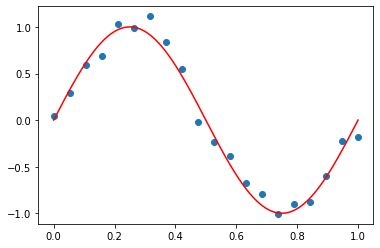

In [4]:
# Drawing functions for training data and correct answer data.
def plot_sin():
  plt.scatter(X, y)
  plt.plot(X_line, sin_X, 'red')
plot_sin()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# Predicted by linear regression.
lin_reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [7]:
# Check the regression variables and intercepts.
lin_reg.intercept_, lin_reg.coef_

(0.8284329606722655, array([-1.63413944]))

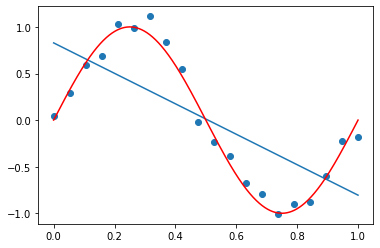

In [8]:
# Draw the model.
plt.plot(X_line, lin_reg.intercept_ + lin_reg.coef_ * X_line)
plot_sin()

## polynomial regression

In [9]:
# Predict the model by the square.
X_2 = X ** 2

In [10]:
X_new = np.concatenate([X.reshape(-1, 1), X_2.reshape(-1, 1)], axis=1)

In [11]:
X_2

array([0.        , 0.00277008, 0.01108033, 0.02493075, 0.04432133,
       0.06925208, 0.09972299, 0.13573407, 0.17728532, 0.22437673,
       0.27700831, 0.33518006, 0.39889197, 0.46814404, 0.54293629,
       0.6232687 , 0.70914127, 0.80055402, 0.89750693, 1.        ])

In [12]:
lin_reg_2 = LinearRegression().fit(X_new, y)

In [13]:
lin_reg_2.intercept_, lin_reg_2.coef_

(0.7786933756057179, array([-1.31912206, -0.31501737]))

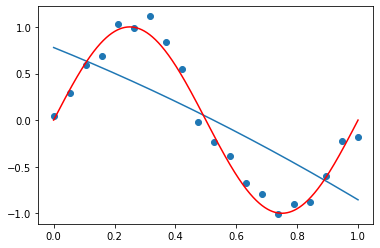

In [14]:
plt.plot(X_line, lin_reg_2.intercept_ + lin_reg_2.coef_[0] * X_line + lin_reg_2.coef_[1] * X_line ** 2)
plot_sin()

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# Polynomial regression.
poly = PolynomialFeatures(degree=3)
poly.fit(X.reshape(-1, 1))
X_poly_3 = poly.transform(X.reshape(-1, 1))

In [17]:
X_poly_3

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 6.84210526e-01, 4.68144044e

In [18]:
lin_reg_3 = LinearRegression().fit(X_poly_3, y)

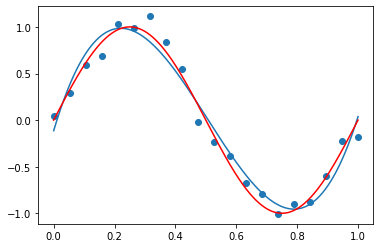

In [19]:
X_line_poly_3 = poly.fit_transform(X_line.reshape(-1, 1))
plt.plot(X_line, lin_reg_3.predict(X_line_poly_3))
plot_sin()

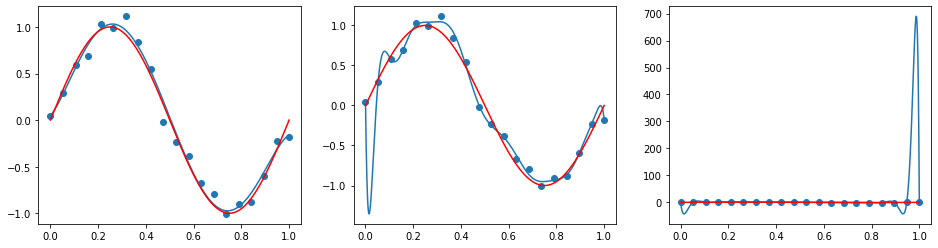

In [20]:
# Check overfitting.
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for degree, ax in zip([5, 15, 25], axes):
  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X.reshape(-1, 1))
  lin_reg = LinearRegression().fit(X_poly, y)
  X_line_poly = poly.fit_transform(X_line.reshape(-1, 1))
  ax.plot(X_line, lin_reg.predict(X_line_poly))
  ax.scatter(X, y)
  ax.plot(X_line, sin_X, 'red')

## Ridge and Lasso regressions

In [21]:
!pip install -q mglearn
import mglearn
import pandas as pd
from sklearn.model_selection import  train_test_split

In [22]:
X, y = mglearn.datasets.load_extended_boston()

In [23]:
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [24]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [26]:
df_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0324,0.012207,0.0,0.056667,0.103951,0.115489,0.048457,0.0,0.037443,0.051702,0.18,0.016142,0.004599,0.0,...,0.065486,0.090426,0.314815,0.028233,0.333512,0.370531,0.155466,0.000000,0.120130,0.165879,0.577505,0.051791,0.411659,0.172723,0.000000,0.133464,0.184291,0.641607,0.057539,0.072470,0.000000,0.055998,0.077324,0.269203,0.024142,0.000000,0.000000,0.000000,0.000000,0.000000,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,5.565944e-08,0.0,0.000057,0.0,0.000041,0.000129,0.000185,0.000082,0.000010,0.000025,0.000131,0.000236,0.000048,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.058710,0.0,...,0.018142,0.095613,0.172840,0.035341,0.300301,0.428917,0.191230,0.023826,0.057519,0.303148,0.547998,0.112049,0.612617,0.273132,0.034030,0.082153,0.432982,0.782698,0.160038,0.121774,0.015172,0.036628,0.193043,0.348962,0.071352,0.001890,0.004564,0.024052,0.043478,0.008890,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,5.555343e-08,0.0,0.000057,0.0,0.000041,0.000164,0.000141,0.000082,0.000010,0.000025,0.000130,0.000233,0.000015,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.058710,0.0,...,0.018142,0.095613,0.171066,0.010969,0.482172,0.416202,0.242314,0.030191,0.072884,0.384128,0.687260,0.044070,0.359259,0.209162,0.026060,0.062912,0.331573,0.593231,0.038040,0.121774,0.015172,0.036628,0.193043,0.345381,0.022147,0.001890,0.004564,0.024052,0.043032,0.002759,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,8.572933e-08,0.0,0.000018,0.0,0.000044,0.000193,0.000129,0.000131,0.000025,0.000020,0.000190,0.000291,0.000010,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.003975,0.0,...,0.010033,0.097474,0.149346,0.005015,0.433695,0.290958,0.295391,0.057266,0.043987,0.427360,0.654786,0.021988,0.195198,0.198173,0.038418,0.029510,0.286708,0.439284,0.014751,0.201192,0.039004,0.029960,0.291077,0.445977,0.014976,0.007561,0.005808,0.056429,0.086459,0.002903,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,4.971238e-07,0.0,0.000044,0.0,0.000106,0.000484,0.000373,0.000316,0.000061,0.000047,0.000458,0.000705,0.000070,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.003975,0.0,...,0.010033,0.097474,0.150206,0.014921,0.472113,0.363012,0.308197,0.059748,0.045894,0.445887,0.687105,0.068255,0.279123,0.236976,0.045941,0.035289,0.342847,0.528321,0.052482,0.201192,0.039004,0.029960,0.291077,0.448545,0.044557,0.007561,0.005808,0.056429,0.086957,0.008638,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [29]:
def print_score(model):
  print(round(model.score(X_train, y_train), 3))
  print(round(model.score(X_test, y_test), 3))

In [30]:
print_score(lin_reg)

0.952
0.607


In [31]:
from sklearn.linear_model import Ridge, Lasso

## Ridge regressions

In [32]:
ridge = Ridge().fit(X_train, y_train)

In [33]:
print_score(ridge)

0.886
0.753


In [34]:
ridge_10 = Ridge(alpha=10).fit(X_train, y_train)
print_score(ridge_10)

0.788
0.636


In [35]:
ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print_score(ridge_01)

0.928
0.772


In [36]:
coefficients = pd.DataFrame({'lin_reg': lin_reg.coef_, 'ridge':ridge.coef_, 'ridge_10':ridge_10.coef_, 'ridge_01':ridge_01.coef_})

In [37]:
coefficients

,lin_reg,ridge,ridge_10,ridge_01
0,-412.710947,-1.413684,-0.811610,-2.333007
1,-52.243207,-1.556619,0.647609,-5.441929
2,-131.898815,-1.465434,-0.809783,-6.128655
3,-12.004136,-0.126616,0.311335,-0.778525
4,-15.510713,-0.079119,-0.684624,1.291530
...,...,...,...,...
99,35.361714,-2.361124,-1.769550,-0.559662
100,11.955343,0.043467,-2.036371,4.947479
101,0.677026,1.208860,1.079849,2.667765
102,2.734520,-6.325992,-3.952641,-6.907626


## Lasso regressions

In [38]:
lasso = Lasso().fit(X_train, y_train)

In [39]:
print_score(lasso)

0.293
0.209


In [40]:
lasso_001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print_score(lasso_001)

0.896
0.766


In [41]:
coefficients_lasso = pd.DataFrame({'lin_reg':lin_reg.coef_, 'lasso':lasso.coef_, 'lasso_001':lasso_001.coef_})

In [42]:
coefficients_lasso

,lin_reg,lasso,lasso_001
0,-412.710947,-0.0,-0.000000
1,-52.243207,0.0,-0.000000
2,-131.898815,-0.0,-0.000000
3,-12.004136,0.0,0.000000
4,-15.510713,-0.0,-0.000000
...,...,...,...
99,35.361714,-0.0,0.000000
100,11.955343,-0.0,-0.000000
101,0.677026,0.0,0.344041
102,2.734520,-0.0,-8.246456
